In [377]:
import numpy as np
import pandas as pd

In [378]:
# Load the dataset from a CSV file
df = pd.read_csv(r"D:\DATA SCIENCE INTERNSHIP\dummy_startup_success_dataset.csv")
df

,domain_category,name,permalink,company_domain,founded_on,operating_status,team_size,num_rounds,total_funding_usd,avg_round_usd,num_founders,avg_founder_exits,tweet_count_last_7d,startup_age_days,has_ipo,has_acquisition,label
0,AI,ai-startup-001,ai-startup-001,aistartup001.com,2024-09-28,active,753,8,62443214.93,7805401.87,1,1.68,495,261,True,False,successful
1,AI,ai-startup-002,ai-startup-002,aistartup002.com,2024-09-11,active,71,4,22359672.16,5589918.04,2,2.12,185,278,False,True,successful
2,AI,ai-startup-003,ai-startup-003,aistartup003.com,2019-09-04,active,210,10,98011363.84,9801136.38,5,1.13,435,2112,True,False,successful
3,AI,ai-startup-004,ai-startup-004,aistartup004.com,2023-06-07,active,822,5,22835873.69,4567174.74,4,2.35,72,740,False,True,successful
4,AI,ai-startup-005,ai-startup-005,aistartup005.com,2024-11-17,active,913,8,13951619.83,1743952.48,3,2.32,134,211,True,False,successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Sustainability,sustainability-startup-096,sustainability-startup-096,sustainabilitystartup096.com,2022-05-06,closed,5,3,105872.07,35290.69,5,0.13,22,1137,False,False,unsuccessful
396,Sustainability,sustainability-startup-097,sustainability-startup-097,sustainabilitystartup097.com,2023-12-29,closed,34,1,1031573.75,1031573.75,4,0.58,46,535,False,False,unsuccessful
397,Sustainability,sustainability-startup-098,sustainability-startup-098,sustainabilitystartup098.com,2019-12-29,closed,27,1,1118729.50,1118729.50,4,0.19,48,1996,False,False,unsuccessful
398,Sustainability,sustainability-startup-099,sustainability-startup-099,sustainabilitystartup099.com,2023-01-13,closed,34,0,0.00,NaN,1,0.16,35,885,False,False,unsuccessful


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   domain_category      400 non-null    object 
 1   name                 400 non-null    object 
 2   permalink            400 non-null    object 
 3   company_domain       400 non-null    object 
 4   founded_on           400 non-null    object 
 5   operating_status     400 non-null    object 
 6   team_size            400 non-null    int64  
 7   num_rounds           400 non-null    int64  
 8   total_funding_usd    400 non-null    float64
 9   avg_round_usd        349 non-null    float64
 10  num_founders         400 non-null    int64  
 11  avg_founder_exits    400 non-null    float64
 12  tweet_count_last_7d  400 non-null    int64  
 13  startup_age_days     400 non-null    int64  
 14  has_ipo              400 non-null    bool   
 15  has_acquisition      400 non-null    boo

In [380]:
df.describe()

,team_size,num_rounds,total_funding_usd,avg_round_usd,num_founders,avg_founder_exits,tweet_count_last_7d,startup_age_days
count,400.000000,400.000000,4.000000e+02,3.490000e+02,400.000000,400.000000,400.000000,400.000000
mean,269.987500,4.130000,2.521037e+07,5.316253e+06,2.937500,1.238075,149.067500,1167.675000
std,318.183483,3.149269,3.098376e+07,5.581919e+06,1.408387,0.859714,153.731785,690.107811
min,1.000000,0.000000,0.000000e+00,3.529069e+04,1.000000,0.000000,0.000000,4.000000
25%,25.000000,2.000000,1.451498e+06,1.204731e+06,2.000000,0.527500,26.000000,580.250000
50%,50.000000,3.000000,4.744341e+06,3.033405e+06,3.000000,1.005000,52.000000,1194.500000
75%,503.000000,7.000000,4.830496e+07,8.274619e+06,4.000000,1.940000,273.250000,1775.250000
max,996.000000,10.000000,9.924174e+07,3.272734e+07,5.000000,2.980000,495.000000,2357.000000


In [381]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
domain_category         0
name                    0
permalink               0
company_domain          0
founded_on              0
operating_status        0
team_size               0
num_rounds              0
total_funding_usd       0
avg_round_usd          51
num_founders            0
avg_founder_exits       0
tweet_count_last_7d     0
startup_age_days        0
has_ipo                 0
has_acquisition         0
label                   0
dtype: int64


In [382]:
# fill missing values with the median for avg_round_usd
df['avg_round_usd'].fillna(df['avg_round_usd'].median(), inplace=True)



C:\Users\HP\AppData\Local\Temp\ipykernel_17364\4269498834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_round_usd'].fillna(df['avg_round_usd'].median(), inplace=True)


In [383]:
# Check for missing values after filling avg_round_usd          
missing_values_after = df.isnull().sum()
print("\nMissing values after filling avg_round_usd:")
print(missing_values_after)




Missing values after filling avg_round_usd:
domain_category        0
name                   0
permalink              0
company_domain         0
founded_on             0
operating_status       0
team_size              0
num_rounds             0
total_funding_usd      0
avg_round_usd          0
num_founders           0
avg_founder_exits      0
tweet_count_last_7d    0
startup_age_days       0
has_ipo                0
has_acquisition        0
label                  0
dtype: int64


In [384]:
# Shape of the DataFrame
print("Shape of the DataFrame:", df.shape)


Shape of the DataFrame: (400, 17)


In [385]:
#Numerical columns
numerical_columns = df.select_dtypes(include=[np.number])
print("Numerical columns in the DataFrame:")
print(numerical_columns)


Numerical columns in the DataFrame:
     team_size  num_rounds  total_funding_usd  avg_round_usd  num_founders  \
0          753           8        62443214.93     7805401.87             1   
1           71           4        22359672.16     5589918.04             2   
2          210          10        98011363.84     9801136.38             5   
3          822           5        22835873.69     4567174.74             4   
4          913           8        13951619.83     1743952.48             3   
..         ...         ...                ...            ...           ...   
395          5           3          105872.07       35290.69             5   
396         34           1         1031573.75     1031573.75             4   
397         27           1         1118729.50     1118729.50             4   
398         34           0               0.00     3033405.20             1   
399         50           0               0.00     3033405.20             2   

     avg_founder_exits  twe

In [386]:

# Categorical columns
categorical_columns = df.select_dtypes(include=[object])
print("Categorical columns in the DataFrame:")
print(categorical_columns)


Categorical columns in the DataFrame:
    domain_category                        name                   permalink  \
0                AI              ai-startup-001              ai-startup-001   
1                AI              ai-startup-002              ai-startup-002   
2                AI              ai-startup-003              ai-startup-003   
3                AI              ai-startup-004              ai-startup-004   
4                AI              ai-startup-005              ai-startup-005   
..              ...                         ...                         ...   
395  Sustainability  sustainability-startup-096  sustainability-startup-096   
396  Sustainability  sustainability-startup-097  sustainability-startup-097   
397  Sustainability  sustainability-startup-098  sustainability-startup-098   
398  Sustainability  sustainability-startup-099  sustainability-startup-099   
399  Sustainability  sustainability-startup-100  sustainability-startup-100   

             

In [387]:
# numerical features
numerical_features = numerical_columns.columns.tolist()
# categorical features
categorical_features = categorical_columns.columns.tolist()
# Display the numerical and categorical features
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['team_size', 'num_rounds', 'total_funding_usd', 'avg_round_usd', 'num_founders', 'avg_founder_exits', 'tweet_count_last_7d', 'startup_age_days']
Categorical features: ['domain_category', 'name', 'permalink', 'company_domain', 'founded_on', 'operating_status', 'label']


In [388]:
# duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows in the DataFrame:", duplicates)


Number of duplicate rows in the DataFrame: 0


In [389]:
# unique values in each categorical column
unique_values = {col: df[col].nunique() for col in categorical_columns.columns}
print("Unique values in each categorical column:")
print(unique_values)


Unique values in each categorical column:
{'domain_category': 4, 'name': 400, 'permalink': 400, 'company_domain': 400, 'founded_on': 370, 'operating_status': 2, 'label': 2}


In [390]:
for col in categorical_columns:
    print(f"\nUnique values in {col}:") #\n → Inserts a newline (moves text to a new line).f"" (f-string) → Allows embedding variables inside curly braces {}
    print(df[col].value_counts())


Unique values in domain_category:
domain_category
AI                100
FinTech           100
Biotech           100
Sustainability    100
Name: count, dtype: int64

Unique values in name:
name
sustainability-startup-084    1
sustainability-startup-083    1
sustainability-startup-082    1
sustainability-startup-081    1
sustainability-startup-080    1
                             ..
ai-startup-005                1
ai-startup-004                1
ai-startup-003                1
ai-startup-002                1
ai-startup-001                1
Name: count, Length: 400, dtype: int64

Unique values in permalink:
permalink
sustainability-startup-084    1
sustainability-startup-083    1
sustainability-startup-082    1
sustainability-startup-081    1
sustainability-startup-080    1
                             ..
ai-startup-005                1
ai-startup-004                1
ai-startup-003                1
ai-startup-002                1
ai-startup-001                1
Name: count, Length: 400

In [391]:
# print caragorical and numerical features
print("\nCategorical features:", categorical_features)
print("Numerical features:", numerical_features)



Categorical features: ['domain_category', 'name', 'permalink', 'company_domain', 'founded_on', 'operating_status', 'label']
Numerical features: ['team_size', 'num_rounds', 'total_funding_usd', 'avg_round_usd', 'num_founders', 'avg_founder_exits', 'tweet_count_last_7d', 'startup_age_days']


In [392]:
# df

In [393]:
# Remove unnecessary columns
columns_to_remove = ['name', 'permalink', 'founded_on', 'company_domain']
df.drop(columns=columns_to_remove, inplace=True)
# Display the DataFrame after removing unnecessary columns
print("\nDataFrame after removing unnecessary columns:")
print(df.head())



DataFrame after removing unnecessary columns:
  domain_category operating_status  team_size  num_rounds  total_funding_usd  \
0              AI           active        753           8        62443214.93   
1              AI           active         71           4        22359672.16   
2              AI           active        210          10        98011363.84   
3              AI           active        822           5        22835873.69   
4              AI           active        913           8        13951619.83   

   avg_round_usd  num_founders  avg_founder_exits  tweet_count_last_7d  \
0     7805401.87             1               1.68                  495   
1     5589918.04             2               2.12                  185   
2     9801136.38             5               1.13                  435   
3     4567174.74             4               2.35                   72   
4     1743952.48             3               2.32                  134   

   startup_age_days  has_ip

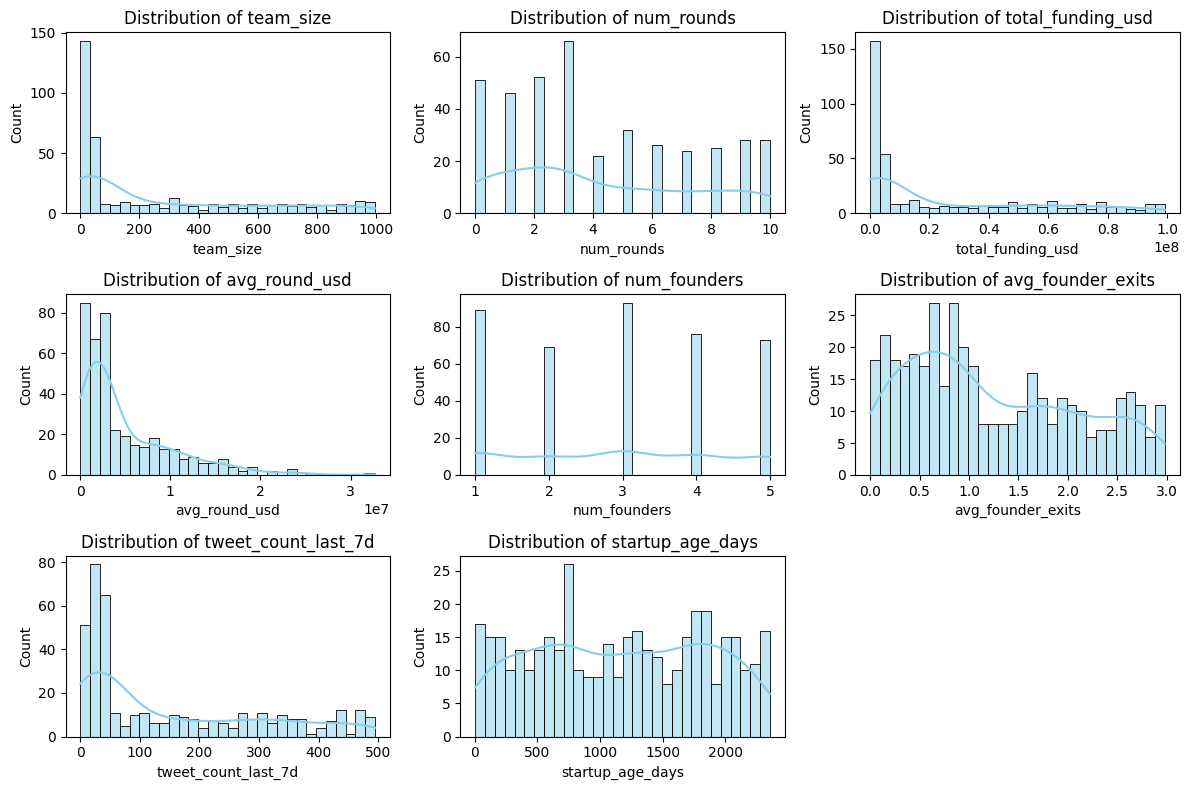

In [394]:
# univariate analysis

import matplotlib.pyplot as plt
import seaborn as sns
# Plot distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17364\3288016279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_17364\3288016279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_17364\3288016279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


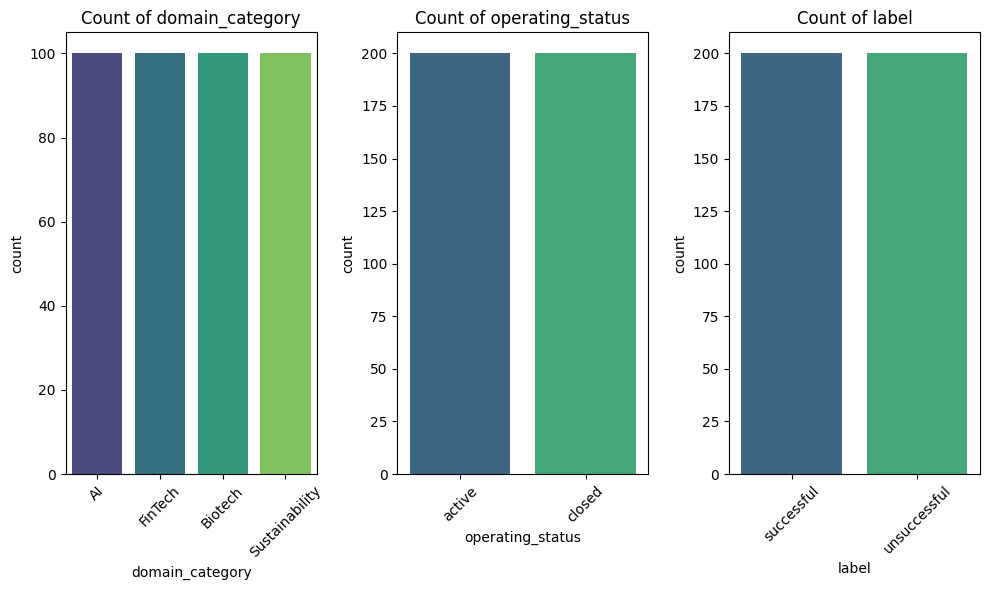

In [395]:
# Plot categorical features for 'domain_category', 'operating_status', 'label'

categorical_to_plot = ['domain_category', 'operating_status', 'label']
plt.figure(figsize=(10, 6))
for i, col in enumerate(categorical_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

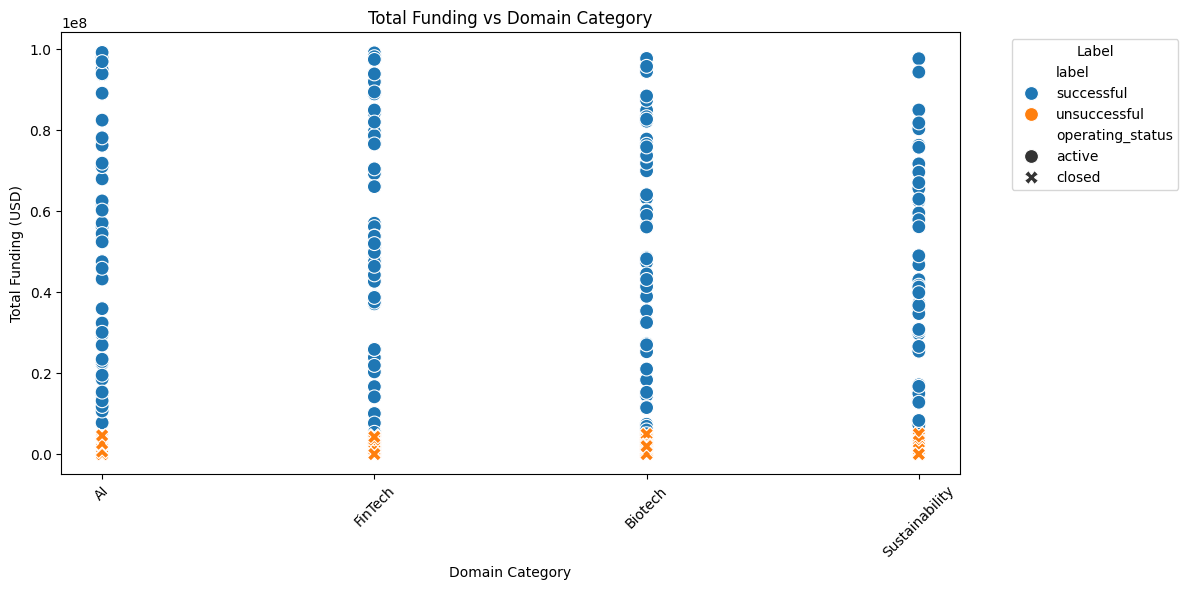

In [396]:
#bivariate analysis
# scatter plot for domain_category and total_funding_usd  
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='domain_category', y='total_funding_usd', hue='label', style='operating_status', s=100)
plt.title('Total Funding vs Domain Category')
plt.xlabel('Domain Category')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

    


In [397]:
df

,domain_category,operating_status,team_size,num_rounds,total_funding_usd,avg_round_usd,num_founders,avg_founder_exits,tweet_count_last_7d,startup_age_days,has_ipo,has_acquisition,label
0,AI,active,753,8,62443214.93,7805401.87,1,1.68,495,261,True,False,successful
1,AI,active,71,4,22359672.16,5589918.04,2,2.12,185,278,False,True,successful
2,AI,active,210,10,98011363.84,9801136.38,5,1.13,435,2112,True,False,successful
3,AI,active,822,5,22835873.69,4567174.74,4,2.35,72,740,False,True,successful
4,AI,active,913,8,13951619.83,1743952.48,3,2.32,134,211,True,False,successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Sustainability,closed,5,3,105872.07,35290.69,5,0.13,22,1137,False,False,unsuccessful
396,Sustainability,closed,34,1,1031573.75,1031573.75,4,0.58,46,535,False,False,unsuccessful
397,Sustainability,closed,27,1,1118729.50,1118729.50,4,0.19,48,1996,False,False,unsuccessful
398,Sustainability,closed,34,0,0.00,3033405.20,1,0.16,35,885,False,False,unsuccessful


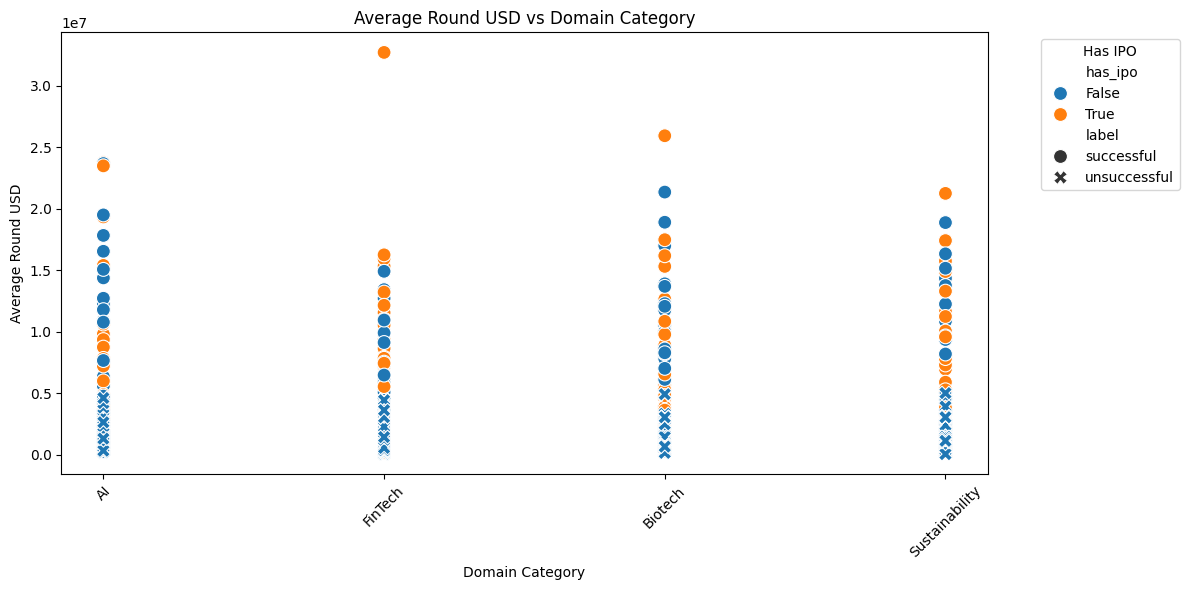

In [398]:
#bivariate analysis for domain_category and has_ipo in hue label
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='domain_category', y='avg_round_usd', hue='has_ipo', style='label', s=100)
plt.title('Average Round USD vs Domain Category')
plt.xlabel('Domain Category')
plt.ylabel('Average Round USD')
plt.xticks(rotation=45)
plt.legend(title='Has IPO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [399]:
#check if data is balanced
label_counts = df['label'].value_counts()
print("Label counts:")
print(label_counts)


Label counts:
label
successful      200
unsuccessful    200
Name: count, dtype: int64


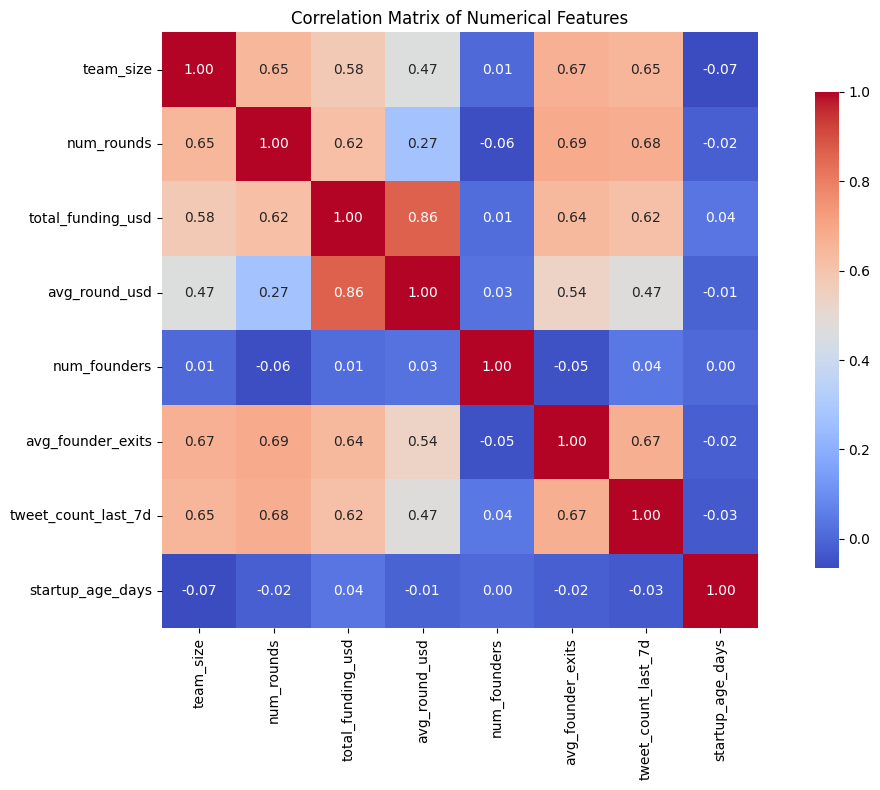

In [400]:
# Multivariate analysis
#corelation matrix for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_17364\2329347841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_17364\2329347841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_17364\2329347841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_17364\2329347841.py:5: FutureWarning: 

Passing

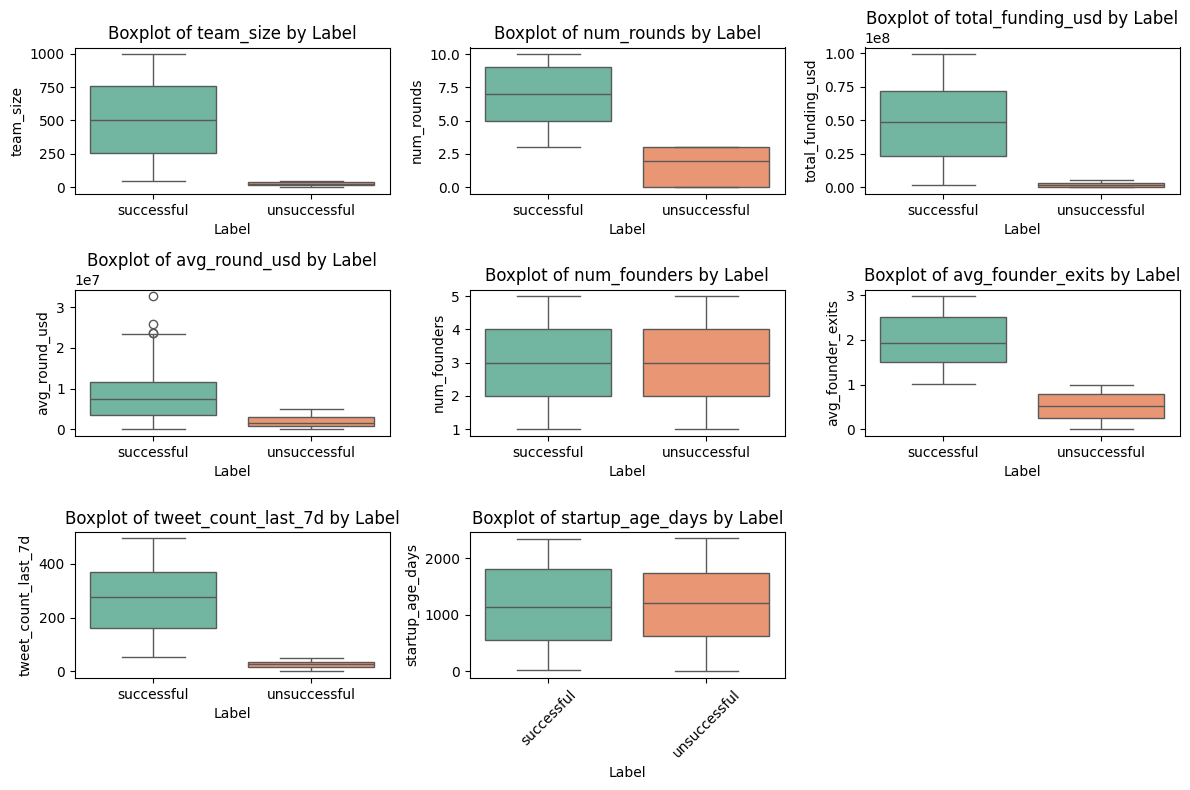

In [401]:
# boxplot of all features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='label', y=col, palette='Set2')
    plt.title(f"Boxplot of {col} by Label")
    plt.xlabel('Label')
    plt.ylabel(col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [402]:
# remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
# Remove outliers for each numerical feature
for col in numerical_features:
    df = remove_outliers_iqr(df, col)
# Display the DataFrame after removing outliers
print("\nDataFrame after removing outliers:")
print(df.describe())



DataFrame after removing outliers:
        team_size  num_rounds  total_funding_usd  avg_round_usd  num_founders  \
count  384.000000  384.000000       3.840000e+02   3.840000e+02    384.000000   
mean   259.033854    4.132812       2.279653e+07   4.359642e+06      2.945312   
std    316.194113    3.210714       2.914525e+07   4.138990e+06      1.412229   
min      1.000000    0.000000       0.000000e+00   3.529069e+04      1.000000   
25%     24.000000    1.000000       1.295693e+06   1.291913e+06      2.000000   
50%     49.000000    3.000000       4.454115e+06   3.033405e+06      3.000000   
75%    486.000000    7.000000       4.309325e+07   6.653439e+06      4.000000   
max    996.000000   10.000000       9.924174e+07   1.654029e+07      5.000000   

       avg_founder_exits  tweet_count_last_7d  startup_age_days  
count         384.000000           384.000000        384.000000  
mean            1.202734           145.559896       1172.841146  
std             0.853476           1

C:\Users\HP\AppData\Local\Temp\ipykernel_17364\793649399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_17364\793649399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_17364\793649399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_17364\793649399.py:5: FutureWarning: 

Passing `pa

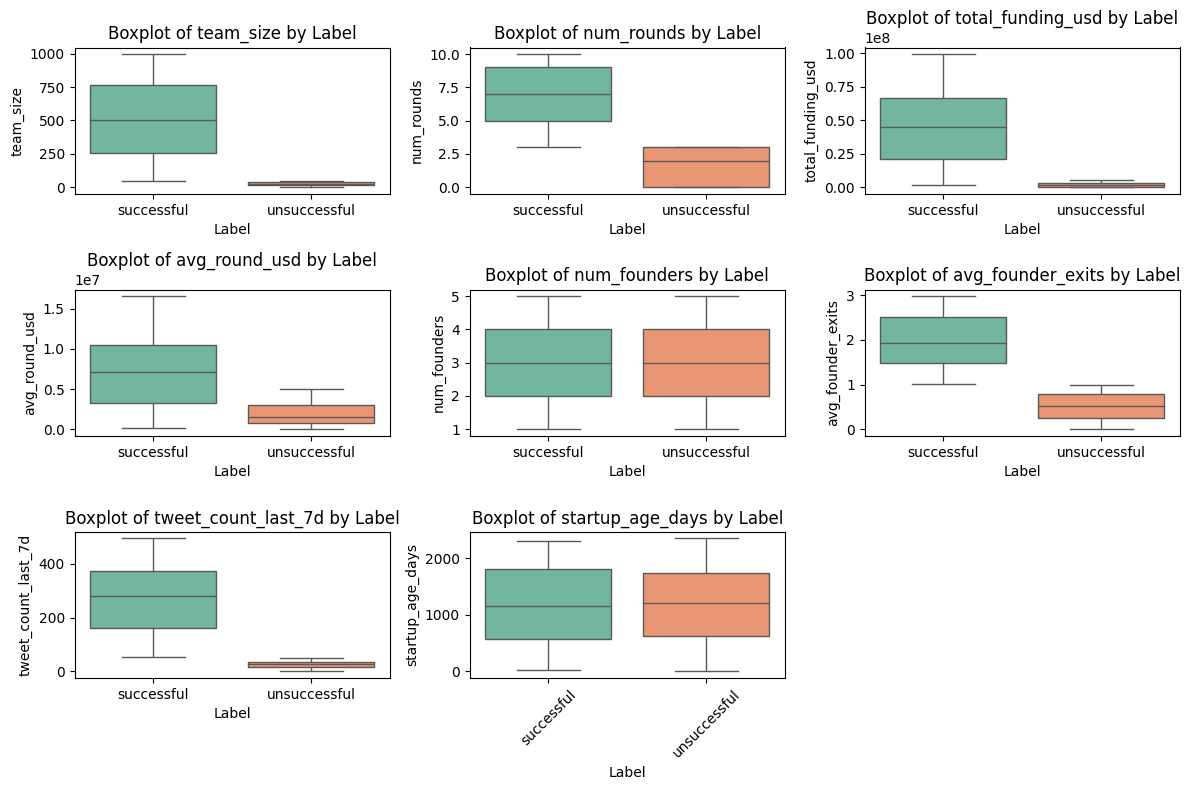

In [403]:
# check outliers after removing
plt.figure(figsize=(12, 8)) 
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='label', y=col, palette='Set2')
    plt.title(f"Boxplot of {col} by Label")
    plt.xlabel('Label')
    plt.ylabel(col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [404]:
# check the shape of the DataFrame after removing outliers
print("Shape of the DataFrame after removing outliers:", df.shape)


Shape of the DataFrame after removing outliers: (384, 13)


In [405]:
# make a new feature Funding Velocity = total funding / startup age in years
df['startup_age_years'] = df['startup_age_days'] / 365
# check and convert startup_age_years less than or equal to 0.5 to 0.5
df.loc[df['startup_age_years'] <= 0.5, 'startup_age_years'] = 0.5
# calculate funding velocity
df['funding_velocity'] = df['total_funding_usd'] / df['startup_age_years']
# add funding velocity to the DataFrame
df['funding_velocity'] = df['funding_velocity'].fillna(0)
# check funding velocity is in dataframe 
print("\nDataFrame after adding funding velocity:")
print(df.head())



DataFrame after adding funding velocity:
  domain_category operating_status  team_size  num_rounds  total_funding_usd  \
0              AI           active        753           8        62443214.93   
1              AI           active         71           4        22359672.16   
2              AI           active        210          10        98011363.84   
3              AI           active        822           5        22835873.69   
4              AI           active        913           8        13951619.83   

   avg_round_usd  num_founders  avg_founder_exits  tweet_count_last_7d  \
0     7805401.87             1               1.68                  495   
1     5589918.04             2               2.12                  185   
2     9801136.38             5               1.13                  435   
3     4567174.74             4               2.35                   72   
4     1743952.48             3               2.32                  134   

   startup_age_days  has_ipo  ha

In [406]:
# check if there are values less than 0.5 in startup_age_years
if (df['startup_age_years'] < 0.5).any():
    print("There are values less than 0.5 in startup_age_years.")   
else:
    print("All values in startup_age_years are greater than or equal to 0.5.")
# check the shape of the DataFrame after adding new feature
print("Shape of the DataFrame after adding new feature:", df.shape)


All values in startup_age_years are greater than or equal to 0.5.
Shape of the DataFrame after adding new feature: (384, 15)


In [407]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# ---------------------------
# Step 1: Split X and y
# ---------------------------
X = df.drop('label', axis=1)
y = df['label']

# ---------------------------
# Step 2: Split into Train and Test BEFORE applying SMOTE
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (307, 14)
Test shape: (77, 14)


In [408]:
# ---------------------------
# Step 3: Build Preprocessing Pipeline
# ---------------------------

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Features:", num_cols)
print("Categorical Features:", cat_cols)


Numerical Features: ['team_size', 'num_rounds', 'total_funding_usd', 'avg_round_usd', 'num_founders', 'avg_founder_exits', 'tweet_count_last_7d', 'startup_age_days', 'startup_age_years', 'funding_velocity']
Categorical Features: ['domain_category', 'operating_status']


In [409]:
# Numeric Transformer: Imputation + Scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical Transformer: Imputation + OneHot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


In [410]:
# ---------------------------
# Step 4: Preprocess Training Data
# ---------------------------
X_train_processed = preprocessor.fit_transform(X_train)

In [411]:
# ---------------------------
# Step 5: Apply SMOTE Only on Train Data
# ---------------------------
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

print("\nAfter SMOTE, Training class distribution:")
print(y_train_balanced.value_counts())


After SMOTE, Training class distribution:
label
successful      160
unsuccessful    160
Name: count, dtype: int64


In [412]:
# Step 6: Preprocess Test Data (No SMOTE on test set)
# ---------------------------
X_test_processed = preprocessor.transform(X_test)

# ✅ Now your preprocessed and balanced training set is ready:
# Features: X_train_balanced
# Labels: y_train_balanced
# Test Set: X_test_processed, y_test

In [413]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

# Train Random Forest on SMOTE balanced data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Predict on Test set
y_pred = model.predict(X_test_processed)
y_proba = model.predict_proba(X_test_processed)[:, 1]




In [414]:
# Evaluate
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Confusion Matrix:
[[37  0]
 [ 0 40]]

Classification Report:
              precision    recall  f1-score   support

  successful       1.00      1.00      1.00        37
unsuccessful       1.00      1.00      1.00        40

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [415]:
# ROC-AUC
roc_auc = roc_auc_score(y_test.map({'unsuccessful': 0, 'successful': 1}), y_proba)
print(f"\nTest ROC-AUC: {roc_auc:.4f}")




Test ROC-AUC: 0.0000


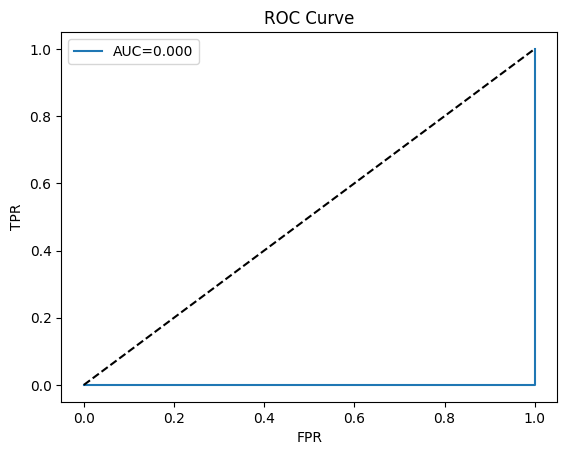

In [416]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test.map({'unsuccessful': 0, 'successful': 1}), y_proba)
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

# ---------------------------
# Train Logistic Regression Model
# ---------------------------
logreg_model = LogisticRegression(
    random_state=42,
    max_iter=1000,              # Increase max_iter to avoid convergence warning
    class_weight='balanced'     # Helps if slight imbalance remains
)
logreg_model.fit(X_train_balanced, y_train_balanced)



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [418]:
# ---------------------------
# Evaluate on Test Set
# ---------------------------
y_pred_lr = logreg_model.predict(X_test_processed)
y_proba_lr = logreg_model.predict_proba(X_test_processed)[:, 1]

print("\nLogistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, digits=4))

roc_auc_lr = roc_auc_score(y_test.map({'unsuccessful': 0, 'successful': 1}), y_proba_lr)
print(f"\nLogistic Regression Test ROC-AUC: {roc_auc_lr:.4f}")


Logistic Regression - Confusion Matrix:
[[37  0]
 [ 0 40]]

Classification Report:
              precision    recall  f1-score   support

  successful     1.0000    1.0000    1.0000        37
unsuccessful     1.0000    1.0000    1.0000        40

    accuracy                         1.0000        77
   macro avg     1.0000    1.0000    1.0000        77
weighted avg     1.0000    1.0000    1.0000        77


Logistic Regression Test ROC-AUC: 0.0000


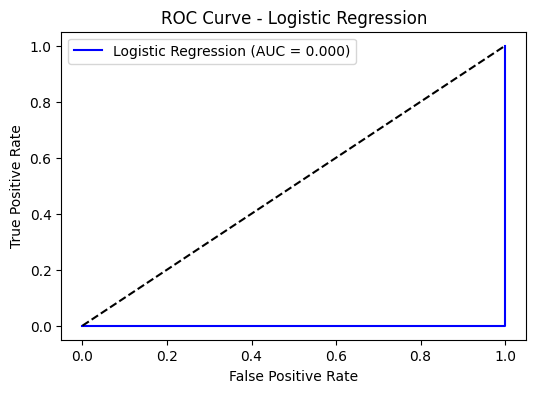

In [419]:
# ---------------------------
# Plot ROC Curve
# ---------------------------
fpr_lr, tpr_lr, _ = roc_curve(y_test.map({'unsuccessful': 0, 'successful': 1}), y_proba_lr)
plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

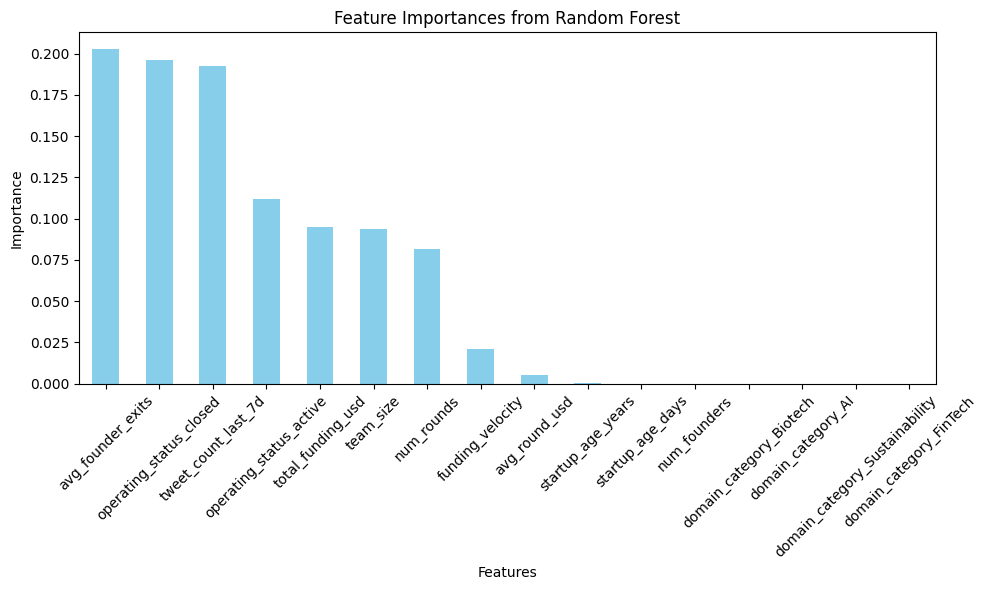

In [420]:
# Plot important features
importances = model.feature_importances_
feature_names = num_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols))
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')   
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


In [421]:
# Print top all important features
print("\nTop Important Features:")
print(feature_importances)






Top Important Features:
avg_founder_exits                 0.202779
operating_status_closed           0.196019
tweet_count_last_7d               0.192447
operating_status_active           0.111814
total_funding_usd                 0.095248
team_size                         0.093644
num_rounds                        0.081396
funding_velocity                  0.021009
avg_round_usd                     0.005071
startup_age_years                 0.000572
startup_age_days                  0.000000
num_founders                      0.000000
domain_category_Biotech           0.000000
domain_category_AI                0.000000
domain_category_Sustainability    0.000000
domain_category_FinTech           0.000000
dtype: float64


In [422]:

# Save the Preprocessing + Logistic Regression Model Together
from sklearn.pipeline import Pipeline

final_logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', logreg_model)
])

joblib.dump(final_logreg_pipeline, 'startup_success_logreg_pipeline.pkl')
print("\n✅ Logistic Regression pipeline saved successfully as 'startup_success_logreg_pipeline.pkl'")


✅ Logistic Regression pipeline saved successfully as 'startup_success_logreg_pipeline.pkl'


# next steps
#  Flask App Development
